In [149]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

In [150]:
texts = [
    '10 землекопов'
    'Согласуйте в репозитории',
    'Заявочка в джире',
    'Ёбанный стыд',
    'ПИДОРАСЫ',
    'НАЯБЫВАЮТ',
    'ГДЕ ТЗ',
    'Согласовано',
    'Лотус лежит',
    'Бан',
    'Не сходится',
    'ГДЕ ПРОДАЖИ',
    'У девушки два пути: либо беременна, либо нет',
    'Временное - это залог постоянного',
    'Там правки по КУАПу',
    'Бля',
    'Ты сбрасывался?',
    'Какие ваши доказательства?',
    'Я там письмо написал',
    'У нас обед',
    'Когда на пиво идём?',
    'Просрочка по кешам в мае',
    'Там задача по преколлекшн',
    'У IT нет ресурса',
    'ОК',
    'PR',
    'Согласуйте',
    'Заявочка в РЕПО',
    'Заявочка в JIRA',
    '',
    '',
    '',
    '',
    '',

]

In [151]:
texts = [t for t in texts if t!='']

In [152]:
mask = np.array(Image.open(r'C:\Users\saloe\Desktop\бкд.png'))

In [153]:
state = 228
rs = np.random.RandomState(state)

In [154]:
wc = WordCloud(max_words=1000, margin=10, mask=mask,
               random_state=state)


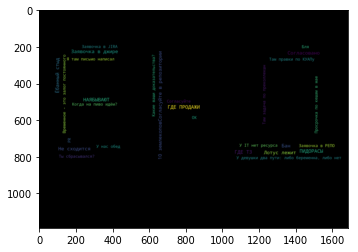

In [155]:
plt.imshow(wc.generate_from_frequencies({t: 1 for t in texts}).recolor(random_state=3), interpolation="bilinear")

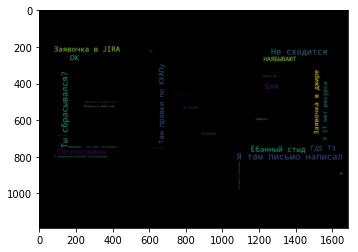

In [156]:
plt.imshow(wc.generate_from_frequencies({t: rs.random() for t in texts}).recolor(random_state=3),
           interpolation="bilinear")


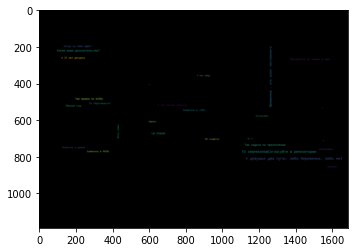

In [157]:
plt.imshow(wc.generate_from_frequencies({t: len(t) for t in texts}).recolor(random_state=3), interpolation="bilinear")

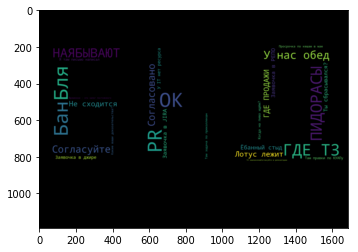

In [158]:
plt.imshow(wc.generate_from_frequencies({t: max(map(len, texts))-len(t) for t in texts}).recolor(random_state=3), interpolation="bilinear")

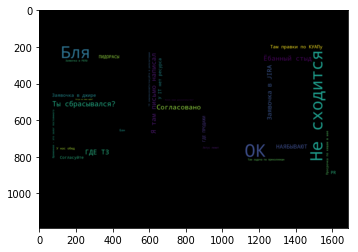

In [159]:
rs = np.random.RandomState(state)
plt.imshow(wc.generate_from_frequencies({t: (max(map(len, texts)) - len(t)) * rs.random() for t in texts}).recolor(
    random_state=3), interpolation="bilinear")
